In [1]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' : # windows OS
    font_family = "Malgun Gothic"
else : #Mac OS
    font_family = "AppleGothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [5]:
# 데이터 생성
s_x = np.linspace(-5, 100, 1000)
s_df = pd.DataFrame(s_x)
s_df.head()

# 차원 정리
s_df_sqz = s_df.squeeze('columns')

In [8]:
### 각 샘플 수에 따른 1000개 평균 계산
sample_data = pd.DataFrame({
    'dist' : s_df_sqz.sample(1000),
    'type' : 'Data '
})
sample_mean_05 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(5).mean() for _ in range(1000)],
    'type' : '5개 평균 샘플'
})
sample_mean_10 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(10).mean() for _ in range(1000)],
    'type' : '10개 평균 샘플'
})
sample_mean_20 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(20).mean() for _ in range(1000)],
    'type' : '20개 평균 샘플'
})
sample_mean_30 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(30).mean() for _ in range(1000)],
    'type' : '30개 평균 샘플'
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_10, 
                     sample_mean_20, sample_mean_30])

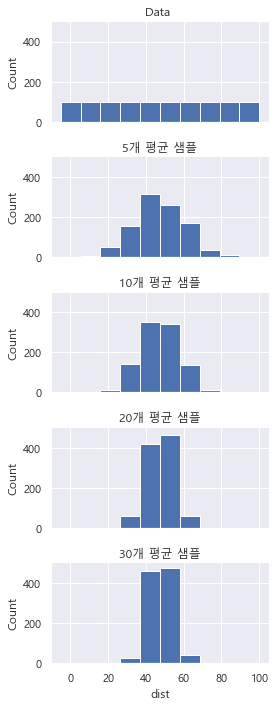

In [11]:
# 샘플 수에 따르는 표본평균의 시각화
g = sns.FacetGrid(results, col='type', col_wrap =1, height=2, aspect=2)

g.map(plt.hist, 'dist', range=[-5, 100], bins=10)
g.set_axis_labels('dist', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()


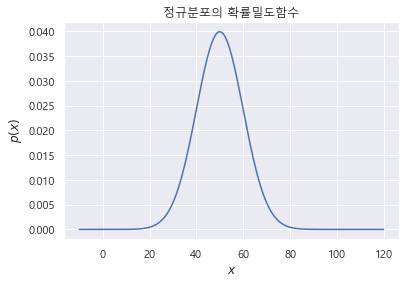

In [12]:
## 기대값이 50이고 표준편차가 10인 정규분포
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
norm = stats.norm(loc=50, scale = 10)

## -10~120 까지 2000개 생성
s_x = np.linspace(-10,120,2000)
## 확률밀도함수
s_pdf = norm.pdf(s_x)

# 정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [ ]:
''' 중심극한정리 : 모집단에 대한 샘플링 횟수가 늘어날수록 그 표본들의 평균은모집단을
    중심으로 정규분포를 띄게 되는 현상'''

In [14]:
## 동전을 던지는 실험
# 동전을 던졌을 때 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100)를 10회 수집

bag_of_mean =[]

for i in range(10) :
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

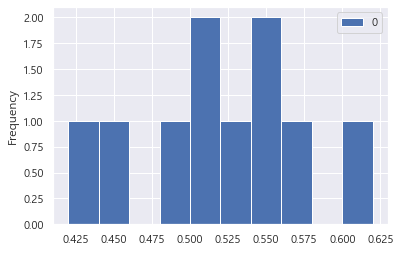

In [15]:
pd.DataFrame(bag_of_mean).plot.hist()

In [16]:
# 동전을 던졌을 때 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100) 을 500회 수집
bag_of_mean = []
for i in range(500) :
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)


<AxesSubplot:ylabel='Frequency'>

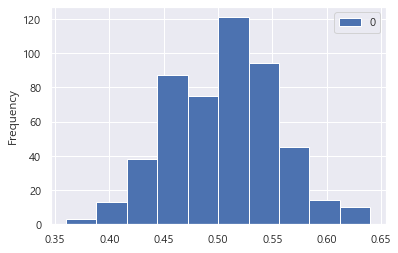

In [17]:
pd.DataFrame(bag_of_mean).plot.hist() #정규분포와 비슷하게 된다.

In [18]:
# 동전을 던졌을 때 앞면과 뒷면이 나오는 경우의 표본데이터(n=100) 을 1000회 수집
bag_of_mean = []
for i in range(1000) :
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

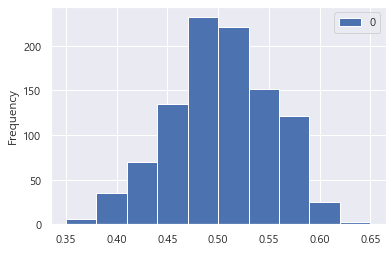

In [19]:
pd.DataFrame(bag_of_mean).plot.hist()  # 정규분포에 더 가까워졌다.

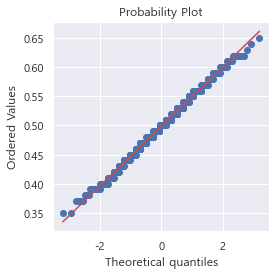

In [23]:
## 위 동전실험 사례에 샘플 1000개는 정규성을 따른다고 판단

fig, ax = plt.subplots(figsize=(4, 4))

# norm_sample = stats.norm.rvs(size=100)
stats.probplot(bag_of_mean, plot=ax)

plt.tight_layout()
plt.show()

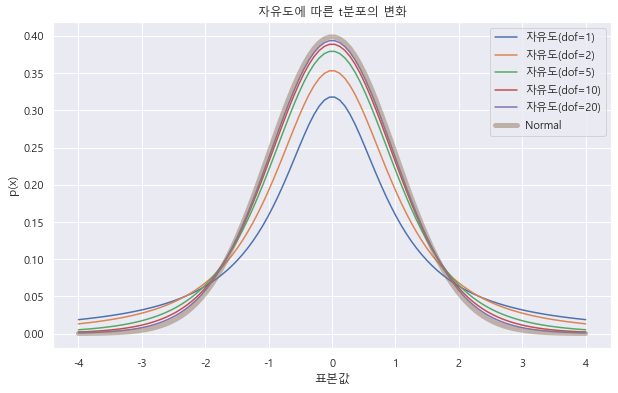

In [24]:
## 자유도에 따른 t분포 확인

t_data = np.linspace(-4, 4, 100)

# 플롯 사이즈 지정
plt.figure(figsize = (10,6))

for dof in [1, 2, 5, 10, 20] :
    t_dist = stats.t(df=dof)
    plt.plot(t_data, t_dist.pdf(t_data), label = ('자유도(dof=%d)' % dof))

    
plt.plot(t_data, stats.norm().pdf(t_data), label = "Normal", lw=5, alpha = 0.5)
plt.title('자유도에 따른 t분포의 변화')
plt.xlabel("표본값")
plt.ylabel('p(x)')
plt.legend()
plt.show()

# 자유도가 커질수록 정규분포를 더 따른다.

In [ ]:
''' 카이제곱 분포 '''

In [25]:
# 카이제곱분포 표현
from scipy.stats import chi2

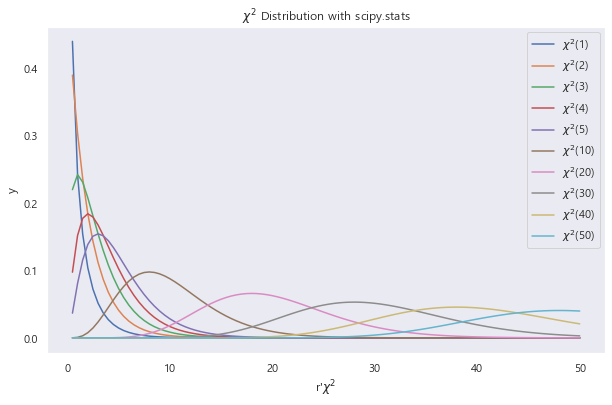

In [26]:
# 라인스페이스 x축 설정
Chi_X = np.linspace(0.5,50 , 100)

plt.figure(figsize = (10,6))

# 자유도에 따른 카이제곱 분포
for dof in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] :
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X), label=r'$\chi^2$(' + str(dof) + ')')
    
plt.xlabel("r'$\chi^2$")
plt.ylabel('y')
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [27]:
# F분포
f_data = np.linspace(0.05 , 3, 1000)

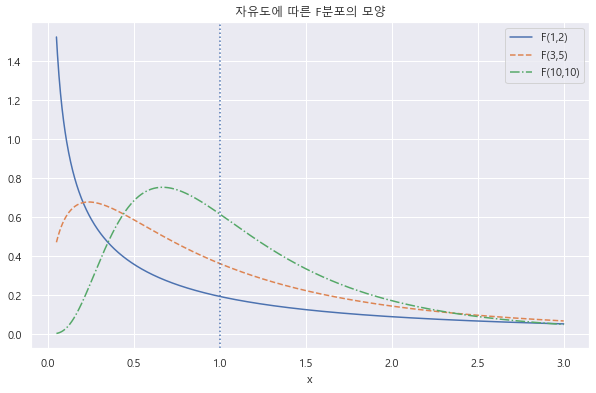

In [31]:
plt.figure(figsize = (10,6))
plt.plot(f_data, stats.f(1,2).pdf(f_data), ls = "-", label="F(1,2)")
plt.plot(f_data, stats.f(3,5).pdf(f_data), ls = "--", label="F(3,5)")
plt.plot(f_data, stats.f(10,10).pdf(f_data), ls = "-.", label="F(10,10)")
plt.axvline(1, ls=':')
plt.xlabel("x")
plt.title('자유도에 따른 F분포의 모양')
plt.legend()
plt.show()